Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Iga Miller"

---

# 1. Zbiór danych

Ze względu na wielkość dostępnych zbiorów danych oraz złożoność obliczeniową metody, wszystkie eksperymenty przeprowadzimy na sztucznie wygenerowanym zbiorze danych, zgodnie z procedurą opisaną przez autorów metody. Zbiór ten w publikacji jest nazywany "zbiorem symulowanym."

Zbiór ten z założenia ma być długim, niestacjonarnym i wysoko-częstotliwościowym ciągiem czasowym, którego dynamika zmienia się w czasie.

Będziemy generować 3 ciągi czasowe o zadanej długości (liczbie próbek). Dynamika wszystkich ciągów czasowych wynika z jednego z 4 ukrytych stanów. W celu losowej zmiany tego stanu w trakcie generowania danego ciągu, zastosowano model HMM (Hidden Markov Model), gdzie prawdopodobieństwo pozostania w danym stanie to 85%, natomiast prawdopodobieństwo przejścia w inny stan to 5% (dla każdego z pozostałych stanów).

Każdy stan jest związany z odpowiednim modelem generowania próbek:

0., 2. modele Gaussian Proces (GP) z różnymi kernelami

1., 3. modele Nonlinear Auto-regressive Moving Average (NARMA) z różnymi zestawami parametrów ($\alpha$, $\beta$).


Stan, w którym się dany ciąg czasowych znajduje w danej chwili będziemy w dalszych ewaluacjach metody używali w problemie klasyfikacyjnym jako klasę danej próbki.

Wygenerujemy teraz zbiór korzystając w powyższego modelu generatywnego. Założmy, że chcemy uzyskać:
- **100 przykładów** uczących
- ciągi czasowe składające się z **1000 próbek**

In [1]:
from src.signal_simulation import simulate_signal

In [2]:
dataset = simulate_signal(
    n_samples=100,
    sig_len=1_000,
    seed=42,
)

Samples: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.11it/s]

Dataset Shape:
Train: torch.Size([64, 3, 1000])
Val: torch.Size([16, 3, 1000])
Test: torch.Size([20, 3, 1000])


Zapisujemy wygenerowany zbiór danych do pliku:

In [4]:
import torch


torch.save(obj=dataset, f="./data/simulated.pt")

Zwizualizujmy wybrany ciąg czasowy:

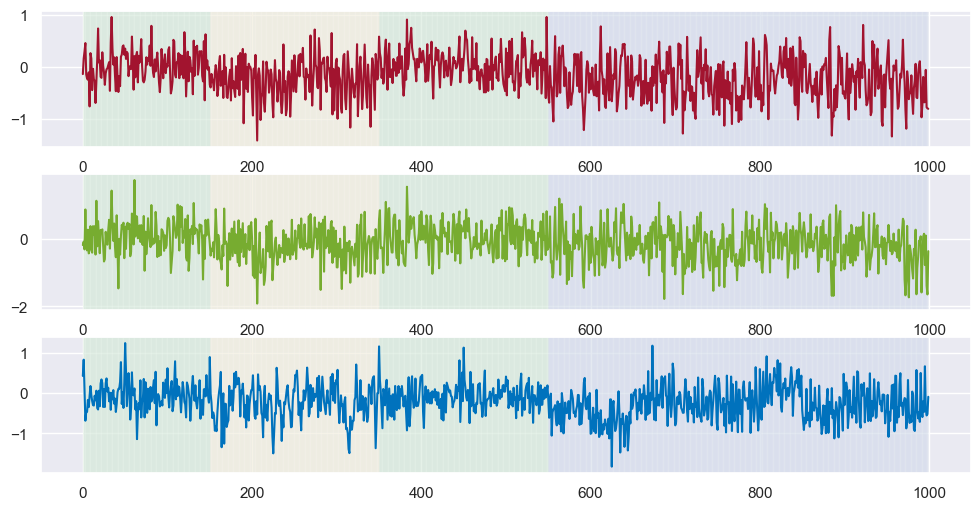

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

x_train = dataset["x_train"]
y_train = dataset["y_train"]

fig, axes = plt.subplots(nrows=3, ncols=1)
color = [
    [0.6350, 0.0780, 0.1840],
    [0.4660, 0.6740, 0.1880],
    [0, 0.4470, 0.7410],
]

for i, ax in enumerate(axes):
    ax.plot(x_train[0, i, :],  c=color[i])
    for t in range(x_train[0, i, :].shape[-1]):
        ax.axvspan(
            t, min(t+1, y_train.shape[-1]-1),
            facecolor=["y", "g", "b", "r"][y_train[0, t]],
            alpha=0.3,
        )
        
fig.set_figheight(6)
fig.set_figwidth(12)